In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Data & Basic Info:

In [87]:
# Load dataset
df = pd.read_csv("Cleaned & featured data.csv")

# Basic info
print(df.shape,"\n")
print(df.info(),"\n")
df.head()

(8558, 47) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Learner SignUp DateTime         8558 non-null   object 
 1   Opportunity Id                  8558 non-null   object 
 2   Opportunity Name                8558 non-null   object 
 3   Opportunity Category            8558 non-null   object 
 4   Opportunity End Date            8558 non-null   object 
 5   First Name                      8558 non-null   object 
 6   Date of Birth                   8558 non-null   object 
 7   Gender                          8558 non-null   object 
 8   Country                         8558 non-null   object 
 9   Institution Name                8558 non-null   object 
 10  Current/Intended Major          8558 non-null   object 
 11  Entry created at                8558 non-null   object 
 12  Status Description   

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,...,Region_Opportunity,Engagement_Score,Engagement_Level,Apply_vs_Start_Gap,Applications_per_User,Unique_Categories_per_User,Region_AgeGroup,Applications_for_Opportunity,Region_Normalized_Applications,User_Success_Rate
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-12-01,Female,Pakistan,NWIHS,...,South_Asia_Course,1.0,High,-460,1,1,South_Asia_Young_Adult,1423,1.0,1.000000
1,2023-01-05 5:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,Saint Louis University,...,South_Asia_Course,1.0,High,-300,14,2,South_Asia_Young_Adult,1423,1.0,0.142857
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute of Technology,...,North_America_Course,0.6,High,-604,17,3,North_America_Young_Adult,1423,1.0,0.470588
3,2023-08-29 5:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,1999-01-11,Female,United States,Saint Louis University,...,North_America_Course,0.6,High,-549,13,3,North_America_Adult,1423,1.0,0.384615
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,...,North_America_Course,1.0,High,-447,1,1,North_America_Young_Adult,1423,1.0,1.000000


In [105]:
# --- Convert 'Date of Birth' to datetime (keep datetime64[ns])
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')

# --- DateTime columns (with full timestamp)
datetime_columns = ['Learner SignUp DateTime','Opportunity End Date','Entry created at','Apply Date','Opportunity Start Date']
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')
'''
# --- String columns 
string_columns = ["First Name", "Country", "Institution Name", "Current/Intended Major",  "Opportunity Name", "Opportunity Category", "Status Description", 
                  "Gender", "Age_Group", "Signup_Weekday", "Region", "Major_Category",  "Engagement_Level", "Country_Gender", "Region_Opportunity", 
                  "Age_Major_Combo", "Region_AgeGroup"]
df[string_columns] = df[string_columns].astype("string")
'''
# --- Float columns
float_columns = [ "Current_Age", "Signup_to_Apply_Days", "Course_Duration_Days", "Opportunity_Popularity", "Engagement_Score"]
df[float_columns] = df[float_columns].astype("float64")

# --- Integer columns 
int_columns = [ "Signup_Month", "Signup_Hour", "Gender_Encoded", "Is_Successful", "Quick_Applicant", "Same_Day_Application", "Late_Applicant", "Popular_Opportunity",
               "Invalid_Application_Timing", "Is_Weekend_Signup"]
for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].astype("Int64")

Explore Structure:

In [107]:
# Column names
print("Columns: \n", df.columns.tolist(), "\n")

# Data types
print(df.dtypes,"\n")

# Check duplicates
print("Duplicate rows: \n", df.duplicated().sum(),"\n")

Columns: 
 ['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name', 'Opportunity Category', 'Opportunity End Date', 'First Name', 'Date of Birth', 'Gender', 'Country', 'Institution Name', 'Current/Intended Major', 'Entry created at', 'Status Description', 'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age', 'Current_Age', 'Age_Group', 'Signup_to_Apply_Days', 'Course_Duration_Days', 'Signup_Month', 'Signup_Weekday', 'Signup_Hour', 'Is_Weekend_Signup', 'Quick_Applicant', 'Invalid_Application_Timing', 'Gender_Encoded', 'Region', 'Major_Category', 'Is_Successful', 'Same_Day_Application', 'Late_Applicant', 'Opportunity_Popularity', 'Popular_Opportunity', 'Age_Major_Combo', 'Country_Gender', 'Region_Opportunity', 'Engagement_Score', 'Engagement_Level', 'Apply_vs_Start_Gap', 'Applications_per_User', 'Unique_Categories_per_User', 'Region_AgeGroup', 'Applications_for_Opportunity', 'Region_Normalized_Applications', 'User_Success_Rate'] 

Learner SignUp DateTime           dateti

Understand Content:

In [109]:
# Unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values\n")

Learner SignUp DateTime: 3907 unique values

Opportunity Id: 23 unique values

Opportunity Name: 22 unique values

Opportunity Category: 5 unique values

Opportunity End Date: 17 unique values

First Name: 2864 unique values

Date of Birth: 2620 unique values

Gender: 4 unique values

Country: 70 unique values

Institution Name: 1466 unique values

Current/Intended Major: 341 unique values

Entry created at: 94 unique values

Status Description: 8 unique values

Status Code: 8 unique values

Apply Date: 8483 unique values

Opportunity Start Date: 20 unique values

Age: 42 unique values

Current_Age: 43 unique values

Age_Group: 5 unique values

Signup_to_Apply_Days: 727 unique values

Course_Duration_Days: 25 unique values

Signup_Month: 12 unique values

Signup_Weekday: 7 unique values

Signup_Hour: 24 unique values

Is_Weekend_Signup: 2 unique values

Quick_Applicant: 2 unique values

Invalid_Application_Timing: 2 unique values

Gender_Encoded: 4 unique values

Region: 5 unique value

Check Missing Values:

In [111]:
# Check missing values
df.isnull().sum()

Learner SignUp DateTime           0
Opportunity Id                    0
Opportunity Name                  0
Opportunity Category              0
Opportunity End Date              0
First Name                        0
Date of Birth                     0
Gender                            0
Country                           0
Institution Name                  0
Current/Intended Major            0
Entry created at                  0
Status Description                0
Status Code                       0
Apply Date                        0
Opportunity Start Date            0
Age                               0
Current_Age                       0
Age_Group                         0
Signup_to_Apply_Days              0
Course_Duration_Days              0
Signup_Month                      0
Signup_Weekday                    0
Signup_Hour                       0
Is_Weekend_Signup                 0
Quick_Applicant                   0
Invalid_Application_Timing        0
Gender_Encoded              

Detect Outliers (With Box Plot):

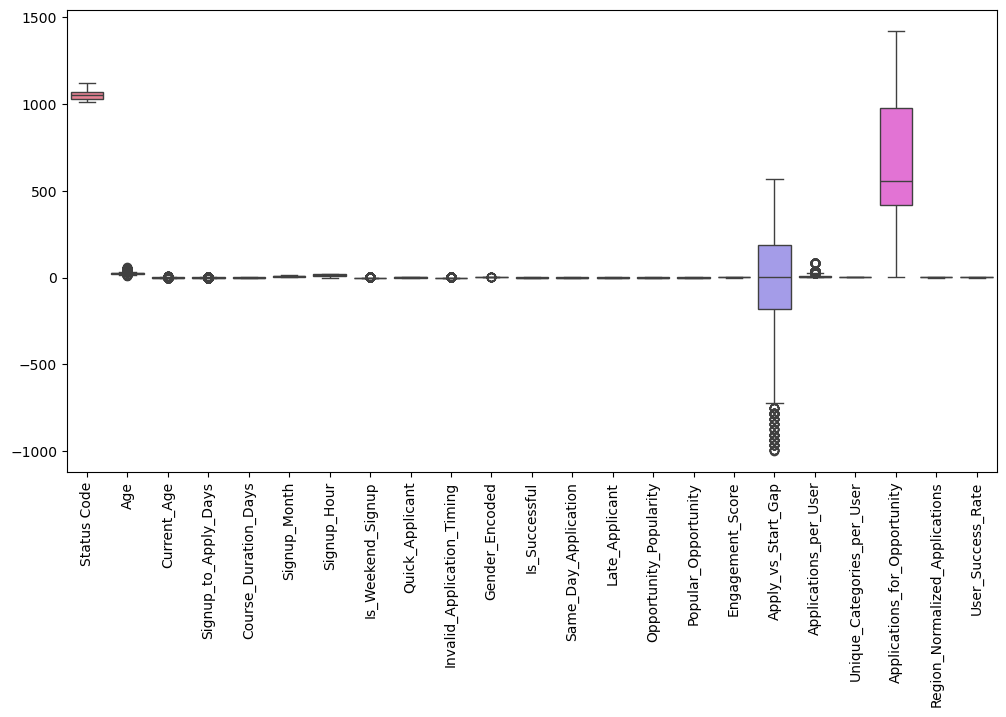

In [113]:
# Boxplot for numeric columns (Outliers Detection)

plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()

Detect Outliers (With code):

In [115]:
#Outliers Detection with code

# Select only numeric columns
num_cols = df.select_dtypes(include=np.number).columns

# Dictionary to store outliers
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                 # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers = values outside [lower_bound, upper_bound]
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"{col}: {outliers[col].count()} outliers\n")

Status Code: 0 outliers

Age: 488 outliers

Current_Age: 640 outliers

Signup_to_Apply_Days: 661 outliers

Course_Duration_Days: 0 outliers

Signup_Month: 0 outliers

Signup_Hour: 0 outliers

Is_Weekend_Signup: 1956 outliers

Quick_Applicant: 0 outliers

Invalid_Application_Timing: 852 outliers

Gender_Encoded: 15 outliers

Is_Successful: 0 outliers

Same_Day_Application: 0 outliers

Late_Applicant: 0 outliers

Opportunity_Popularity: 0 outliers

Popular_Opportunity: 0 outliers

Engagement_Score: 0 outliers

Apply_vs_Start_Gap: 92 outliers

Applications_per_User: 486 outliers

Unique_Categories_per_User: 0 outliers

Applications_for_Opportunity: 0 outliers

Region_Normalized_Applications: 0 outliers

User_Success_Rate: 0 outliers



Inconsistencies Check:

General Statistics:

In [117]:
# General stats
df.describe(include="all").transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Learner SignUp DateTime,8558,NaN,NaN,NaN,2023-10-18 17:36:44.979317760,2023-01-03 17:53:41,2023-06-26 23:17:56.750000128,2023-09-20 17:10:36,2024-01-25 06:27:07,2024-12-03 00:00:00,NaN
Opportunity Id,8558,23,00000000-0GN2-A0AY-7XK8-C5FZPP,1423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opportunity Name,8558,22,Career Essentials: Getting Started with Your P...,1423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opportunity Category,8558,5,Internship,5421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opportunity End Date,8558,NaN,NaN,NaN,2024-09-30 14:25:09.585533952,2023-01-03 11:36:46,2024-06-29 18:52:39,2024-11-03 18:00:00,2024-11-03 18:00:00,2025-12-24 03:34:00,NaN
First Name,8558,2864,Not Specified,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Birth,8558,NaN,NaN,NaN,1999-10-07 01:45:50.268754432,1966-08-08 00:00:00,1998-07-01 00:00:00,2000-07-22 00:00:00,2001-12-24 00:00:00,2019-01-04 00:00:00,NaN
Gender,8558,4,Male,5018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,8558,70,United States,3976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Institution Name,8558,1466,Saint Louis University,4517,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Summary Statistics:

In [119]:
# ENHANCED SUMMARY STATISTICS

num_cols = df.select_dtypes(include=[np.number])
summary = num_cols.describe().transpose()

# Add useful columns
summary['range'] = summary['max'] - summary['min']
summary['missing'] = df.isnull().sum()[num_cols.columns]
summary['missing_pct'] = (summary['missing'] / len(df) * 100).round(1)

# Select and order relevant columns
summary = summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'missing_pct']].round(2)

# Display with nice styling
print("NUMERICAL FEATURES SUMMARY")
print("=" * 80)
summary.style.background_gradient(cmap="viridis", subset=['mean', 'std']).format({'missing_pct': '{:.1f}%'})


NUMERICAL FEATURES SUMMARY


,count,mean,std,min,25%,50%,75%,max,range,missing_pct
Status Code,8558.000000,1052.225987,21.665207,1010.000000,1030.000000,1050.000000,1070.000000,1120.000000,110.000000,0.0%
Age,8558.000000,25.392732,4.398612,6.000000,23.000000,25.000000,27.000000,59.000000,53.000000,0.0%
Current_Age,8558.000000,0.000000,1.000058,-4.404096,-0.538499,-0.083723,0.371053,7.647472,12.051568,0.0%
Signup_to_Apply_Days,8558.000000,-0.000000,1.000058,-3.592119,-0.473119,-0.466110,0.494121,4.398128,7.990246,0.0%
Course_Duration_Days,8558.000000,0.000000,1.000058,-1.095391,-0.737021,-0.314783,0.590012,1.913498,3.008889,0.0%
Signup_Month,8558.000000,6.213251,3.465684,1.000000,3.000000,6.000000,9.000000,12.000000,11.000000,0.0%
Signup_Hour,8558.000000,12.314443,6.830070,0.000000,6.000000,13.000000,18.000000,23.000000,23.000000,0.0%
Is_Weekend_Signup,8558.000000,0.228558,0.419928,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0%
Quick_Applicant,8558.000000,0.518930,0.499671,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0%
Invalid_Application_Timing,8558.000000,0.099556,0.299425,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0%


In [101]:
# CATEGORICAL FEATURES OVERVIEW  

cat_cols = df.select_dtypes(include=['object', 'category'])
if len(cat_cols.columns) > 0:
    cat_summary = pd.DataFrame({
        'Feature': cat_cols.columns,
        'Unique_Values': [cat_cols[col].nunique() for col in cat_cols.columns],
        'Most_Frequent': [cat_cols[col].mode().iloc[0] if len(cat_cols[col].mode()) > 0 else 'None' for col in cat_cols.columns],
        'Missing_Count': [cat_cols[col].isnull().sum() for col in cat_cols.columns]
    })
    
    print("\nCATEGORICAL FEATURES SUMMARY")
    print("=" * 50)
    print(cat_summary.to_string(index=False))
else:
    print("\nNo categorical features found")


CATEGORICAL FEATURES SUMMARY
               Feature  Unique_Values                                                     Most_Frequent  Missing_Count
        Opportunity Id             23                                    00000000-0GN2-A0AY-7XK8-C5FZPP              0
      Opportunity Name             22 Career Essentials: Getting Started with Your Professional Journey              0
  Opportunity Category              5                                                        Internship              0
            First Name           2864                                                     Not Specified              0
                Gender              4                                                              Male              0
               Country             70                                                     United States              0
      Institution Name           1466                                            Saint Louis University              0
Current/Intended M

In [121]:
# DATASET HEALTH CHECK

# Identify column types
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
date_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns

print(f"\nDATASET HEALTH CHECK")
print("=" * 30)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Numerical: {len(num_cols)} features")
print(f"Categorical: {len(cat_cols)} features")
print(f"Datetime: {len(date_cols)} features")
print(f"Total Missing: {df.isnull().sum().sum():,} ({(df.isnull().sum().sum()/df.size*100):.1f}%)")
print(f"Duplicates: {df.duplicated().sum():,} rows")
print(f"Memory: {df.memory_usage(deep=True).sum()/1024**2:.1f} MB")


DATASET HEALTH CHECK
Shape: 8,558 rows × 47 columns
Numerical: 23 features
Categorical: 18 features
Datetime: 6 features
Total Missing: 0 (0.0%)
Duplicates: 0 rows
Memory: 11.2 MB


DATA VISUALIZATION

In [7]:
main_color ="#1c679e"

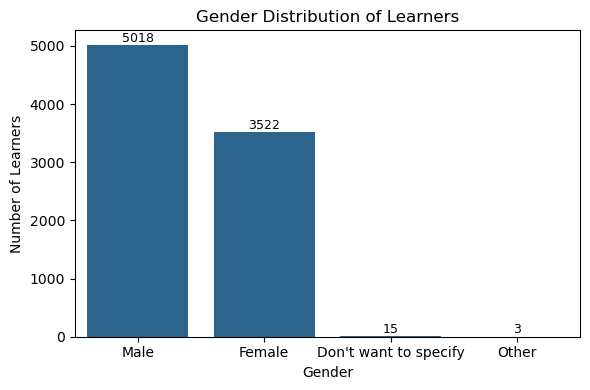

In [73]:
# 1. Gender distribution 
plt.figure(figsize=(6,4))
gender_order = df['Gender'].value_counts().index
ax = sns.countplot(
    data=df,
    x='Gender',color=main_color,order=gender_order)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 2, str(int(height)), ha='center', va='bottom', fontsize=9)
plt.title("Gender Distribution of Learners")
plt.ylabel("Number of Learners")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

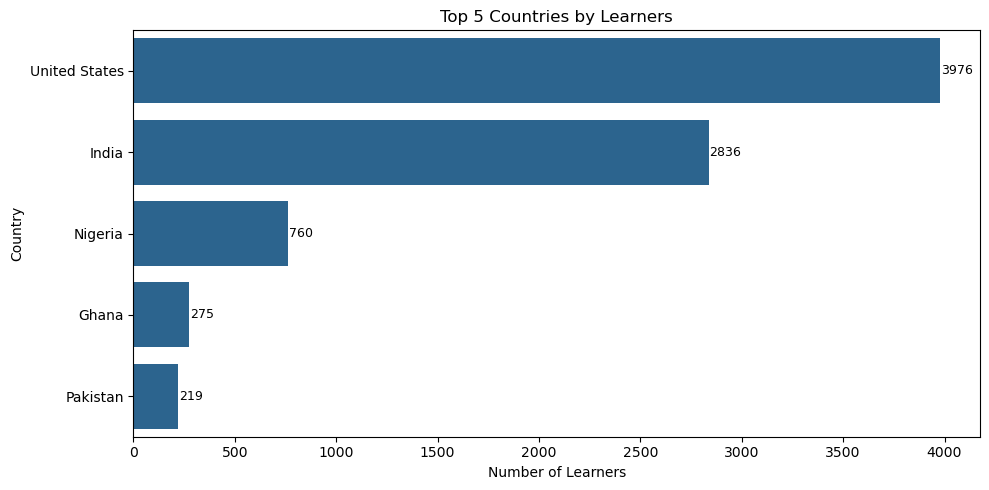

In [75]:
# 2. Country-wise learner count 
plt.figure(figsize=(10,5))
top_countries = df['Country'].value_counts().head(5)
ax = sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    color=main_color)
for i, v in enumerate(top_countries.values):
    ax.text( v + 5, i,  str(v),  va='center',  ha='left',  fontsize=9)
plt.title("Top 5 Countries by Learners")
plt.xlabel("Number of Learners")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

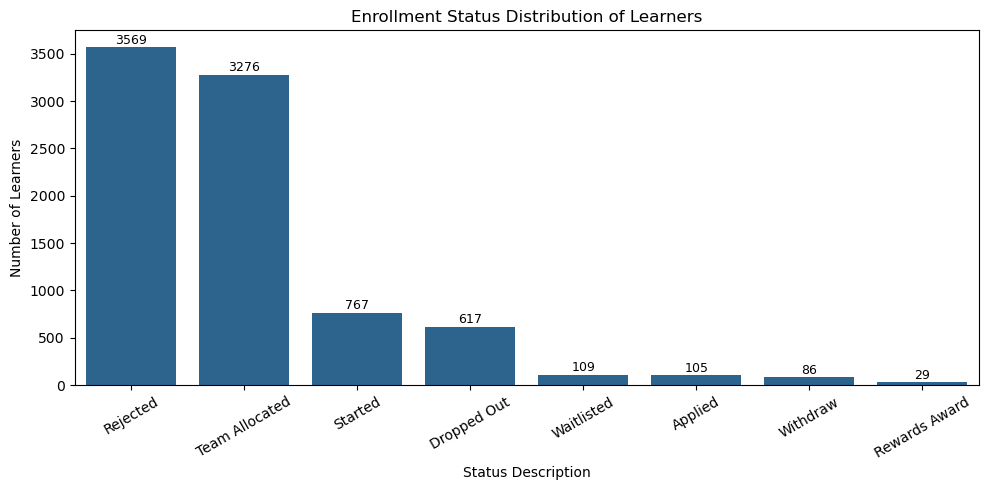

In [59]:
# 3. Enrollment Status distribution
plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=df, 
    x='Status Description', 
    order=df['Status Description'].value_counts().index, 
    color=main_color)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 5, str(int(p.get_height())), ha='center', va='bottom', fontsize=9)
plt.title("Enrollment Status Distribution of Learners")
plt.xticks(rotation=30)
plt.ylabel("Number of Learners")
plt.tight_layout()
plt.show()

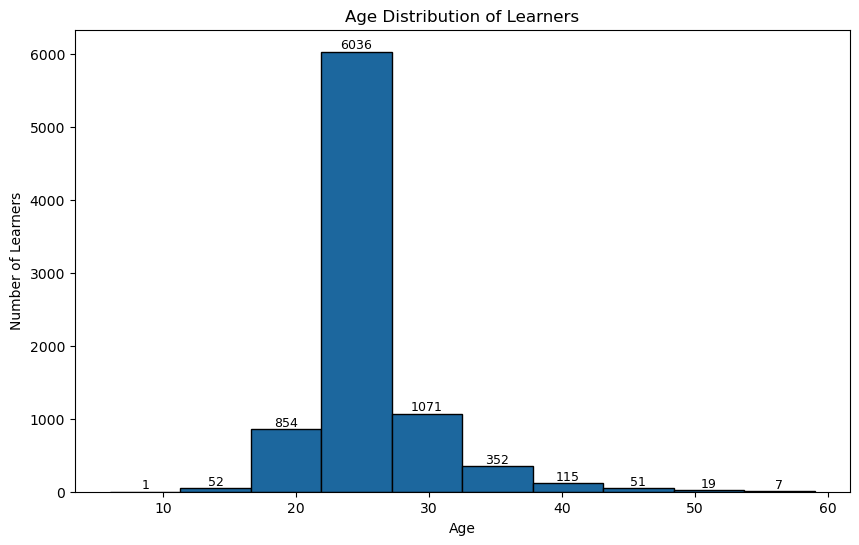

In [61]:
# 4. Age distribution
df['Age'] = (pd.to_datetime("today") - df['Date of Birth']).dt.days // 365
fig, ax = plt.subplots(figsize=(10,6))
counts, bins, patches = ax.hist(df['Age'], bins=10, edgecolor='black', color=main_color)
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    if count > 0:
        ax.text((bin_left + bin_right)/2, count, str(int(count)),
                ha='center', va='bottom', fontsize=9)
ax.set_title("Age Distribution of Learners")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Learners")
plt.show()

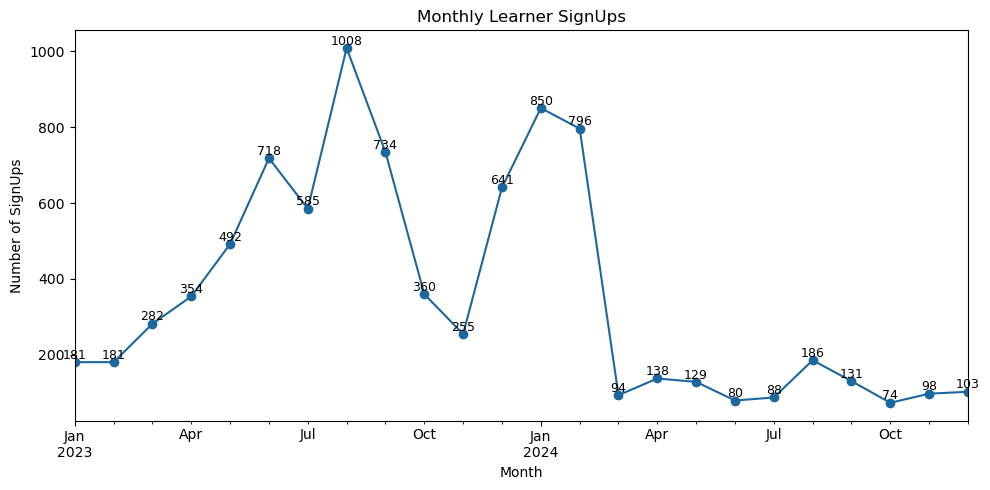

In [48]:
# 5. Signups over time (monthly trend)
plt.figure(figsize=(10,5))
monthly_signups = df['Learner SignUp DateTime'].dt.to_period("M").value_counts().sort_index()
monthly_signups.index = monthly_signups.index.to_timestamp() 
ax = monthly_signups.plot(kind='line', marker='o', color=main_color)
for x, y in zip(monthly_signups.index, monthly_signups.values):
    ax.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=9)
plt.title("Monthly Learner SignUps")
plt.xlabel("Month")
plt.ylabel("Number of SignUps")
plt.tight_layout()
plt.show()


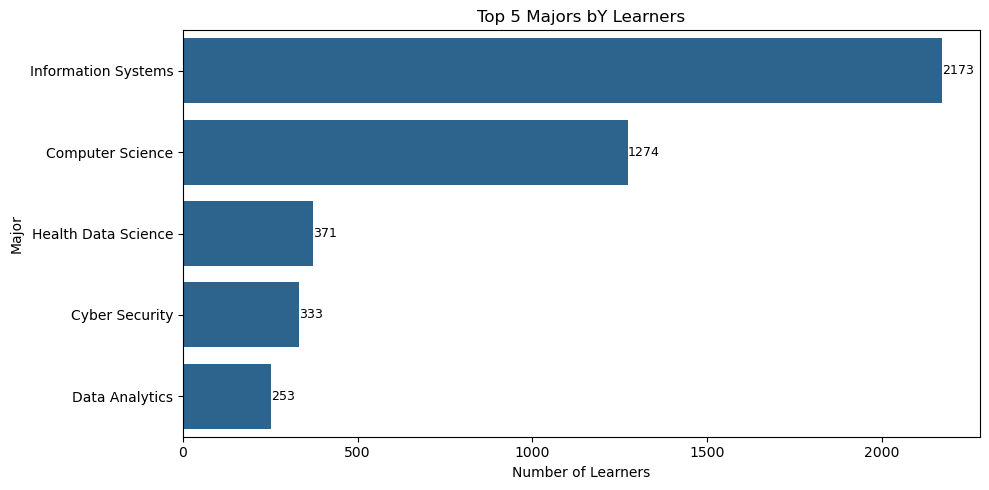

In [81]:
# 6. Top 5 Majors 
plt.figure(figsize=(10,5))
top_majors = df['Current/Intended Major'].value_counts().head(5)
ax = sns.barplot(x=top_majors.values, y=top_majors.index, color=main_color)
plt.title("Top 5 Majors bY Learners")
plt.xlabel("Number of Learners")
plt.ylabel("Major")
for i, v in enumerate(top_majors.values):
    plt.text(v + 0.2, i, str(v), color='black', va='center', fontsize=9)
plt.tight_layout()
plt.show()

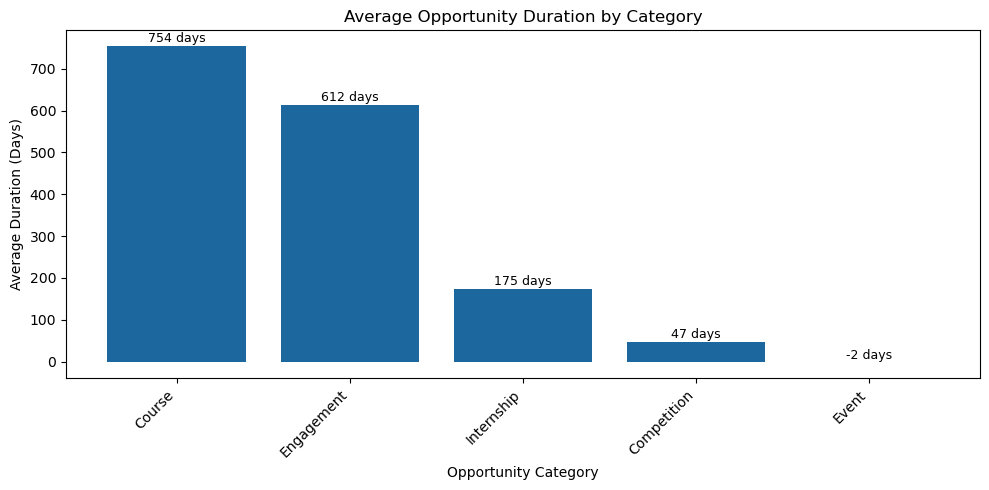

In [67]:
# 7. Average duration by Opportunity Category 
avg_duration = (
    (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days
    .groupby(df['Opportunity Category'])
    .mean()
    .reset_index(name='Avg_Duration_Days'))
avg_duration = avg_duration.sort_values(by="Avg_Duration_Days", ascending=False)
plt.figure(figsize=(10,5))
bars = plt.bar(
    avg_duration['Opportunity Category'],
    avg_duration['Avg_Duration_Days'],
    color=main_color)
plt.xlabel("Opportunity Category")
plt.ylabel("Average Duration (Days)")
plt.title("Average Opportunity Duration by Category")
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    if not np.isnan(height):  
        plt.text(bar.get_x() + bar.get_width()/2, height + 2, f"{round(height)} days", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

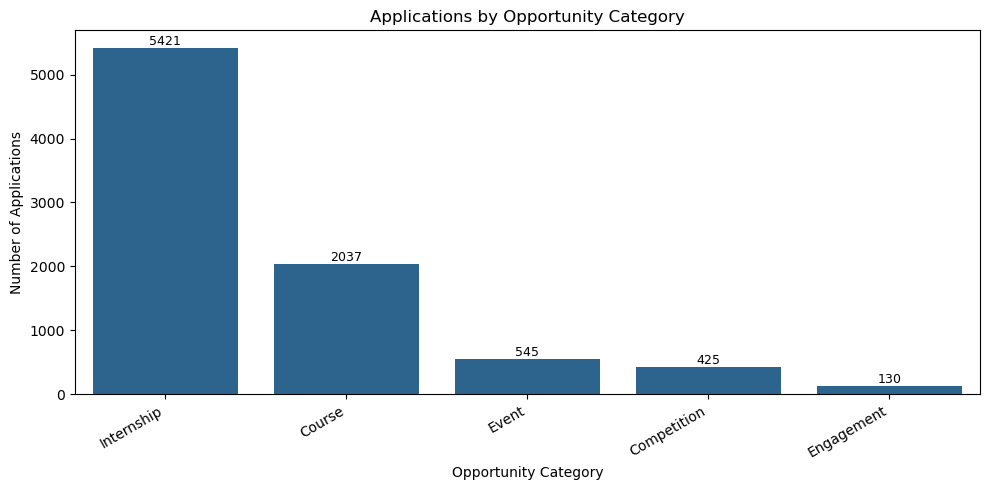

In [69]:
# 8. Opportunity category popularity
plt.figure(figsize=(10,5))
opportunity_counts = df['Opportunity Category'].value_counts()
ax = sns.barplot(
    x=opportunity_counts.index, 
    y=opportunity_counts.values, 
    color=main_color)
for i, v in enumerate(opportunity_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)
plt.title("Applications by Opportunity Category")
plt.ylabel("Number of Applications")
plt.xlabel("Opportunity Category")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

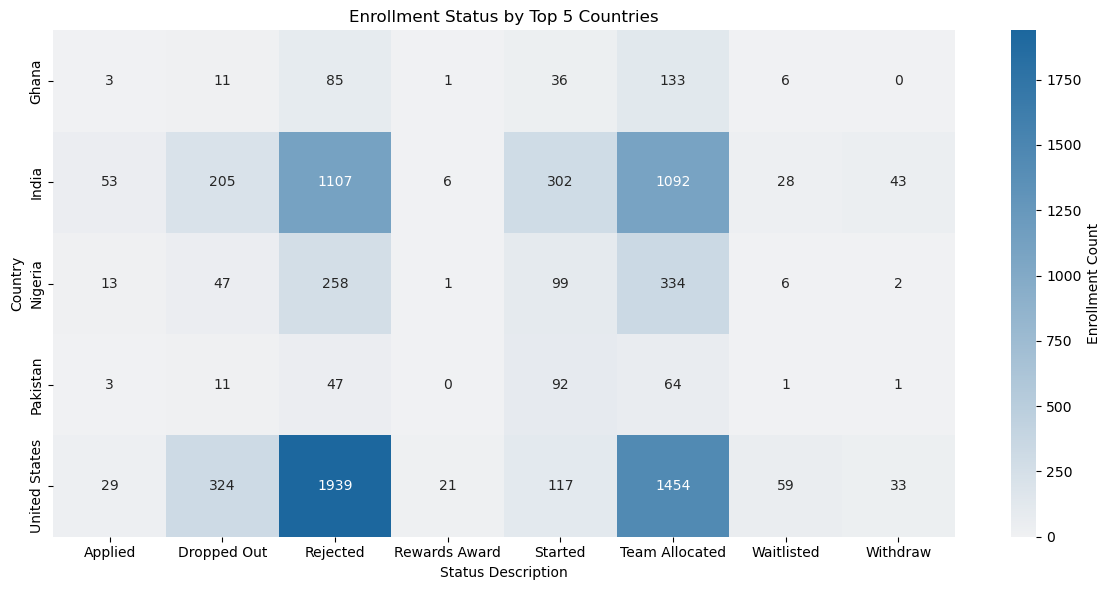

In [71]:
# 9. Enrollment by Country and Status (Heatmap)
plt.figure(figsize=(12, 6))
top_5_countries = df['Country'].value_counts().head(5).index
filtered_df = df[df['Country'].isin(top_5_countries)]
heatmap_data = pd.crosstab(filtered_df['Country'], filtered_df['Status Description'])
sns.heatmap(
    heatmap_data,
    annot=True, fmt='d',
    cmap=sns.light_palette(main_color, as_cmap=True),  
    cbar_kws={'label': 'Enrollment Count'})
plt.title('Enrollment Status by Top 5 Countries')
plt.ylabel("Country")
plt.xlabel("Status Description")
plt.tight_layout()
plt.show()

In [66]:
df.columns[17:33]

Index(['Current_Age', 'Age_Group', 'Signup_to_Apply_Days',
       'Course_Duration_Days', 'Signup_Month', 'Signup_Weekday', 'Signup_Hour',
       'Is_Weekend_Signup', 'Quick_Applicant', 'Invalid_Application_Timing',
       'Gender_Encoded', 'Region', 'Major_Category', 'Is_Successful',
       'Same_Day_Application', 'Late_Applicant'],
      dtype='object')

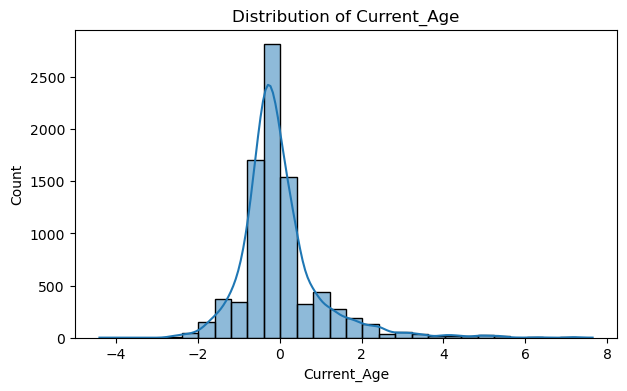

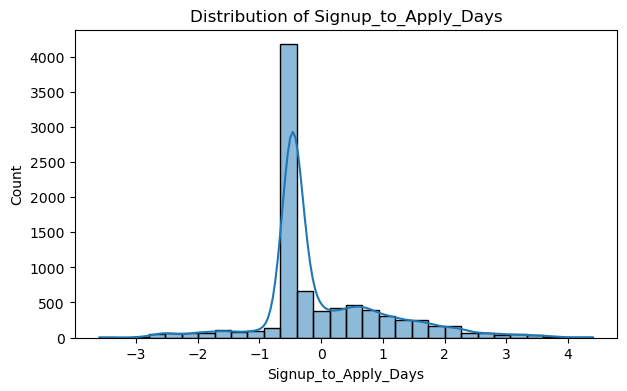

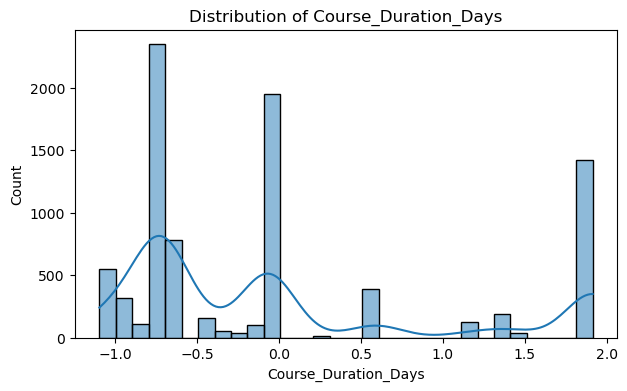

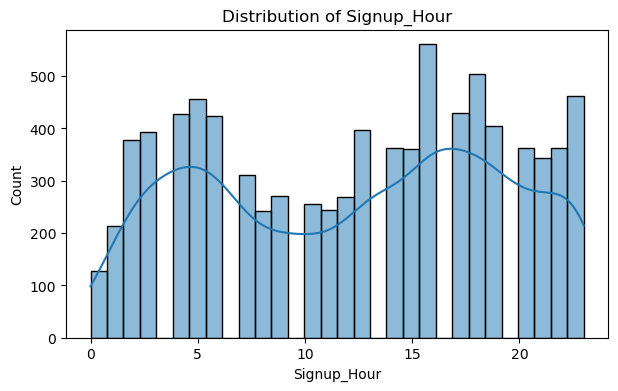

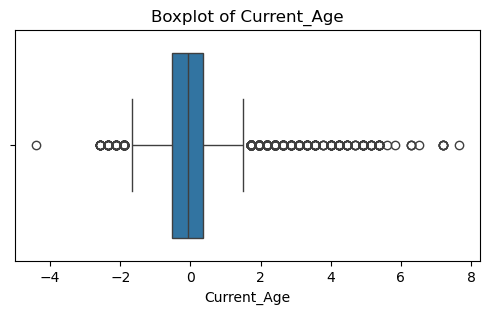

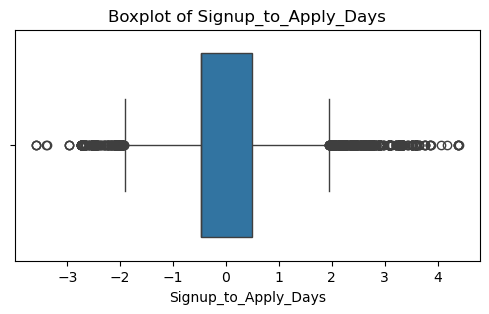

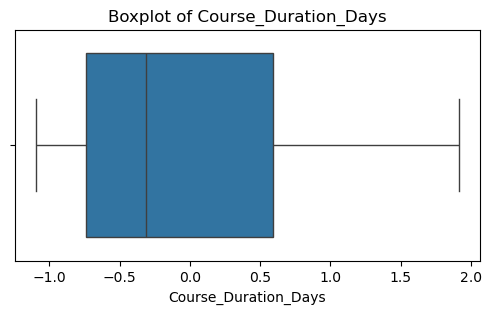

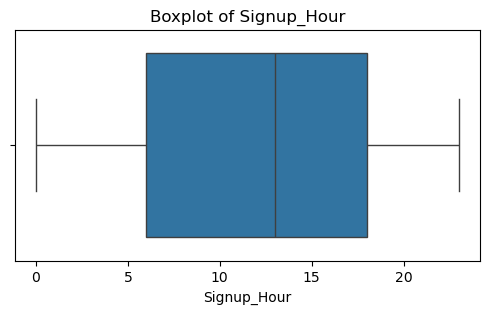

In [9]:
# Numerical columns
num_cols = ["Current_Age", "Signup_to_Apply_Days", "Course_Duration_Days", "Signup_Hour"]

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots for numerical features
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

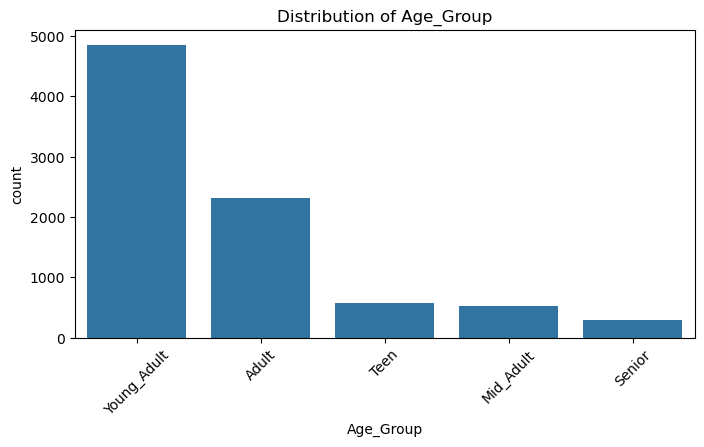

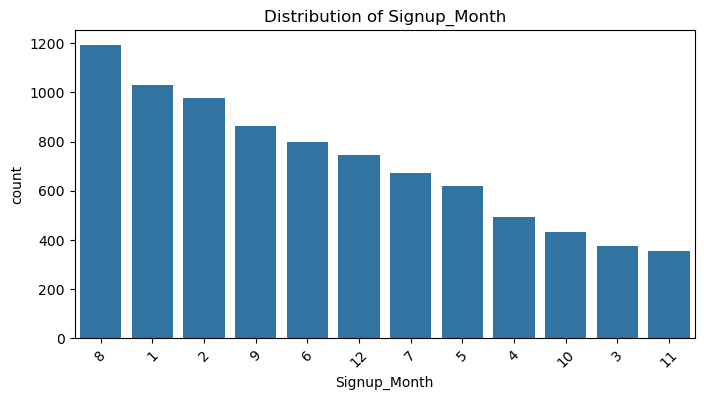

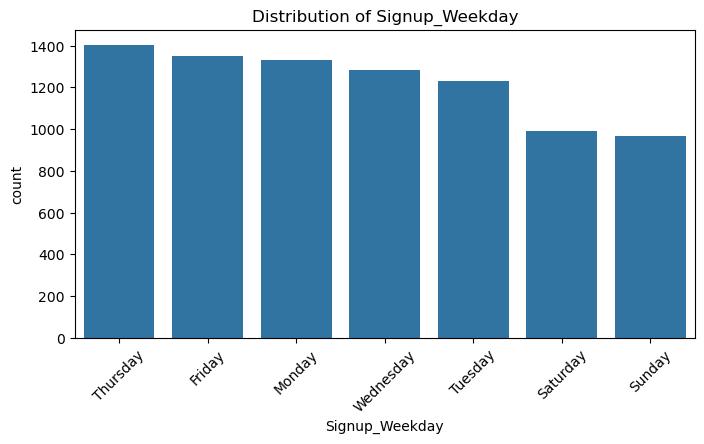

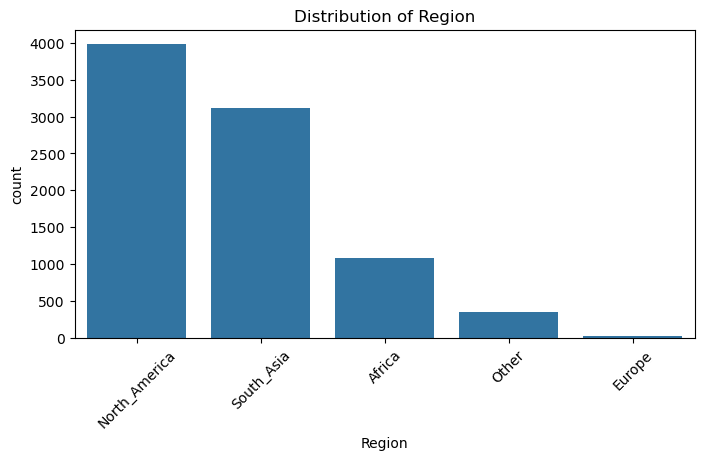

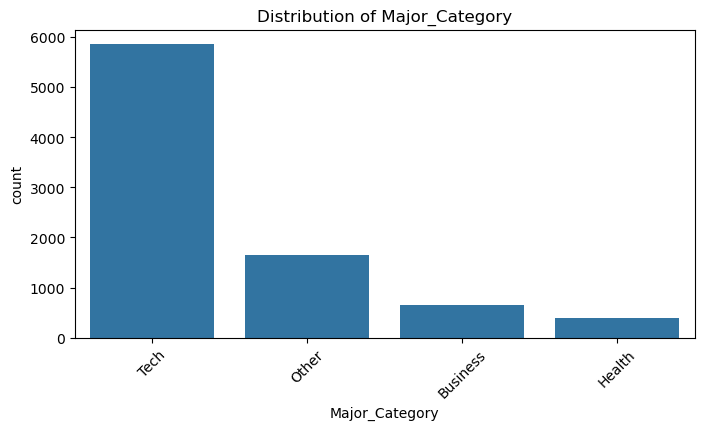

In [11]:
# Categorical columns
cat_cols = ["Age_Group", "Signup_Month", "Signup_Weekday", "Region", "Major_Category"]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


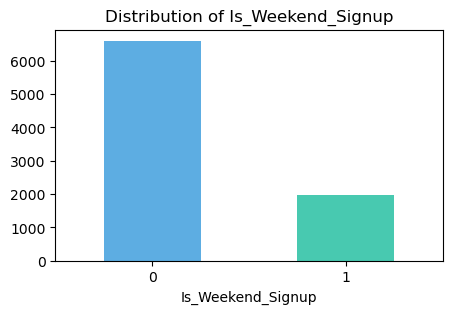

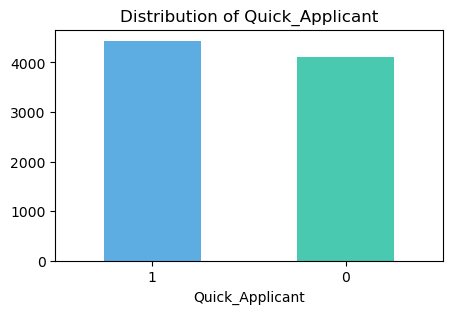

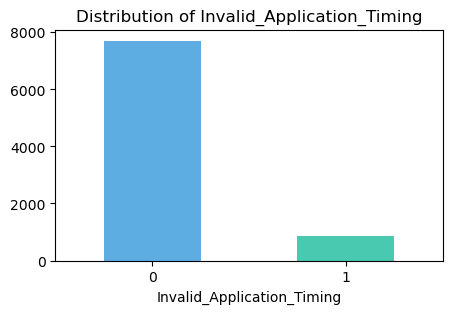

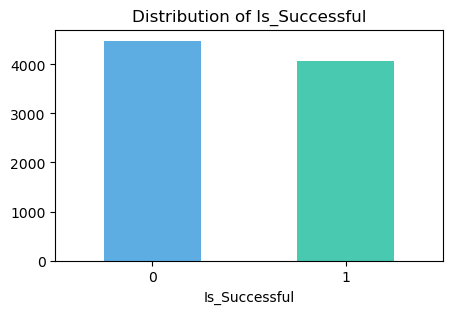

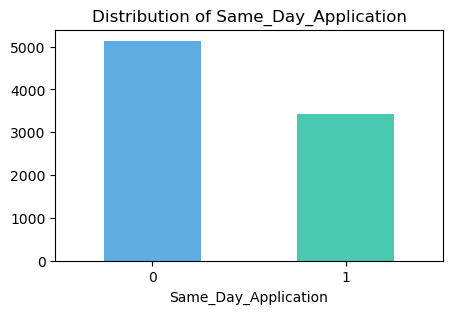

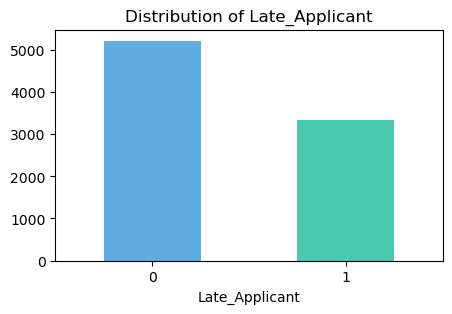

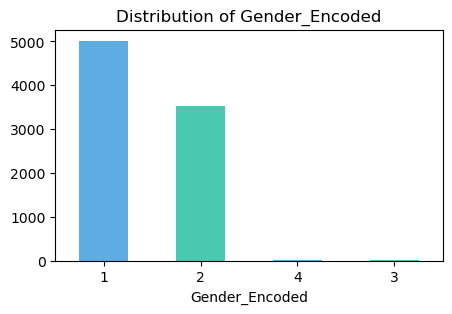

In [13]:
# Binary columns
bin_cols = ["Is_Weekend_Signup", "Quick_Applicant", "Invalid_Application_Timing",
            "Is_Successful", "Same_Day_Application", "Late_Applicant", "Gender_Encoded"]

for col in bin_cols:
    plt.figure(figsize=(5,3))
    df[col].value_counts().plot(kind="bar", color=["#5DADE2","#48C9B0"])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=0)
    plt.show()

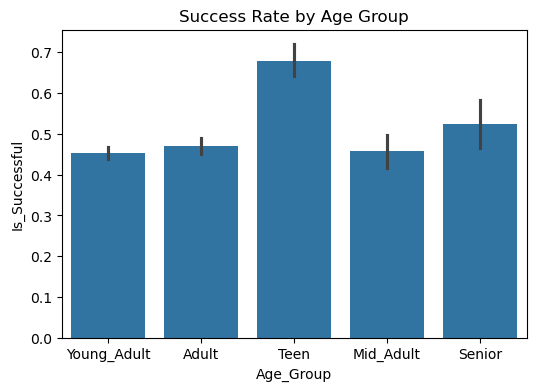

In [15]:
# Success rate vs Age Group
plt.figure(figsize=(6,4))
sns.barplot(x="Age_Group", y="Is_Successful", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Success Rate by Age Group")
plt.show()

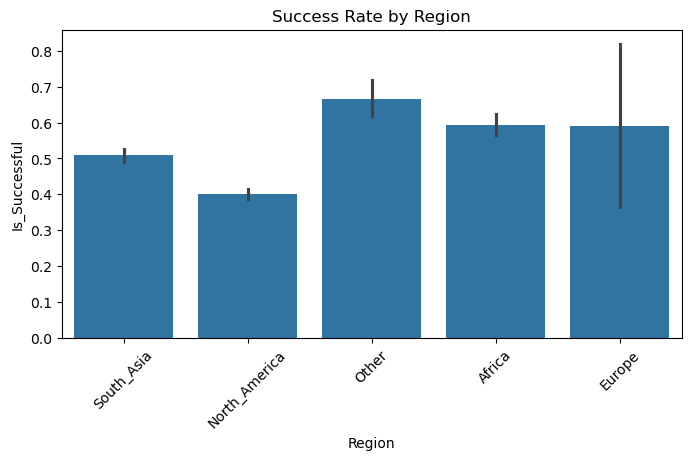

In [17]:
# Success rate vs Region
plt.figure(figsize=(8,4))
sns.barplot(x="Region", y="Is_Successful", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Success Rate by Region")
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2972\4129770378.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index="Signup_Weekday",


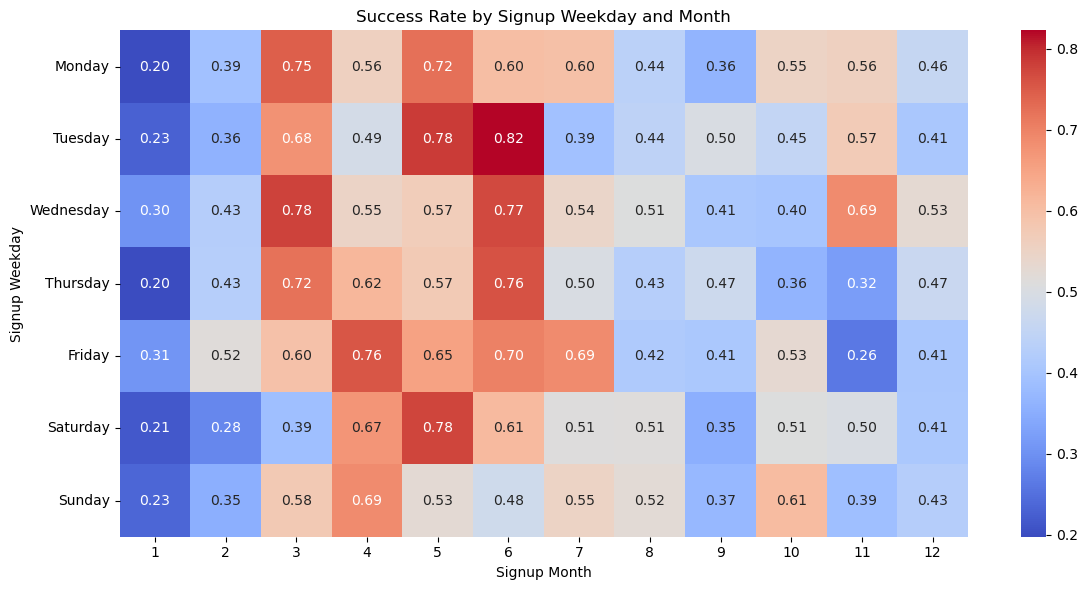

In [61]:
# Ensure Signup_Month is numeric
df["Signup_Month"] = pd.to_numeric(df["Signup_Month"], errors="coerce")

# Ensure weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Signup_Weekday"] = pd.Categorical(df["Signup_Weekday"], categories=weekday_order, ordered=True)

# Pivot table (mean success rate)
pivot = df.pivot_table(index="Signup_Weekday", 
                       columns="Signup_Month", 
                       values="Is_Successful", 
                       aggfunc="mean")

# Convert pivot to numeric (safety)
pivot = pivot.astype(float)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Success Rate by Signup Weekday and Month")
plt.xlabel("Signup Month")
plt.ylabel("Signup Weekday")
plt.tight_layout()
plt.show()

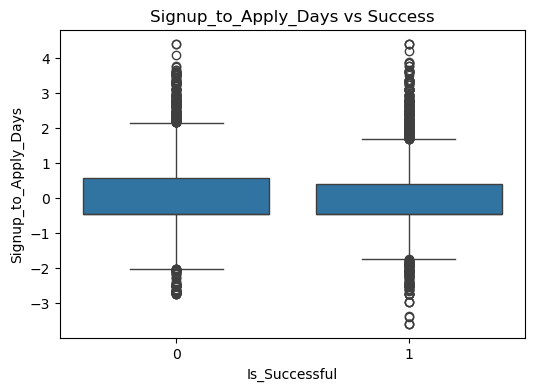

In [21]:
# Signup_to_Apply_Days vs Success
plt.figure(figsize=(6,4))
sns.boxplot(x="Is_Successful", y="Signup_to_Apply_Days", data=df)
plt.title("Signup_to_Apply_Days vs Success")
plt.show()

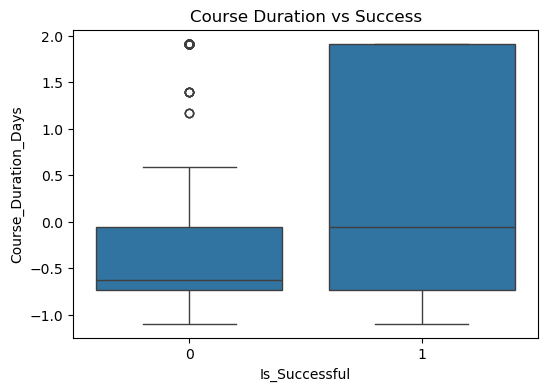

In [23]:
# Course_Duration vs Success
plt.figure(figsize=(6,4))
sns.boxplot(x="Is_Successful", y="Course_Duration_Days", data=df)
plt.title("Course Duration vs Success")
plt.show()

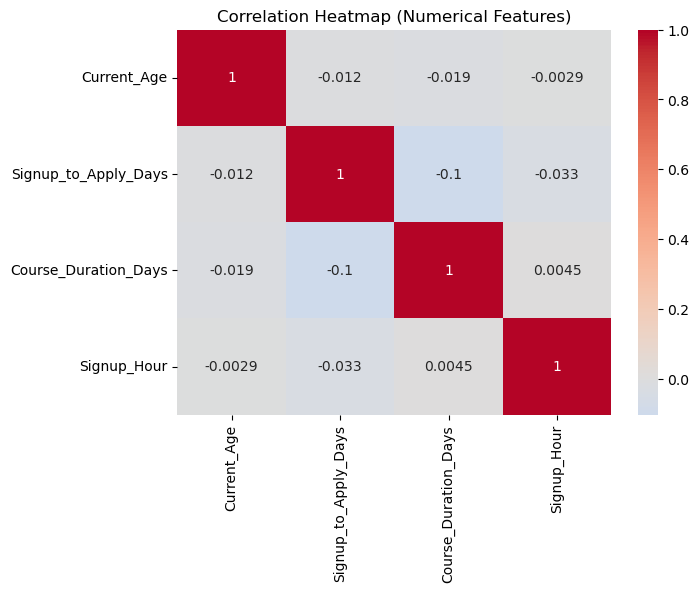

In [27]:
# Correlation heatmap of numerical features
plt.figure(figsize=(7,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

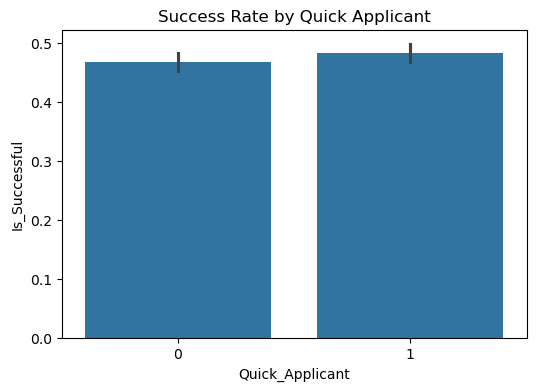

In [29]:
# Quick Applicant vs Success
plt.figure(figsize=(6,4))
sns.barplot(x="Quick_Applicant", y="Is_Successful", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Success Rate by Quick Applicant")
plt.show()

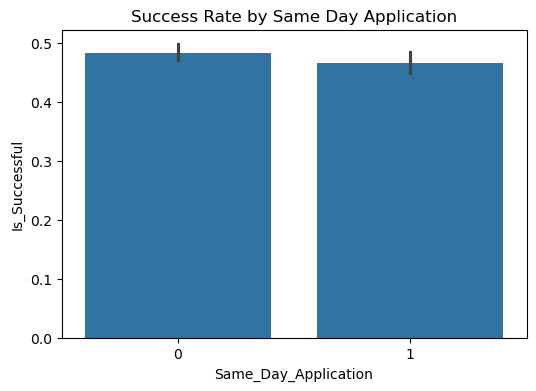

In [31]:
# Same Day Application vs Success
plt.figure(figsize=(6,4))
sns.barplot(x="Same_Day_Application", y="Is_Successful", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Success Rate by Same Day Application")
plt.show()

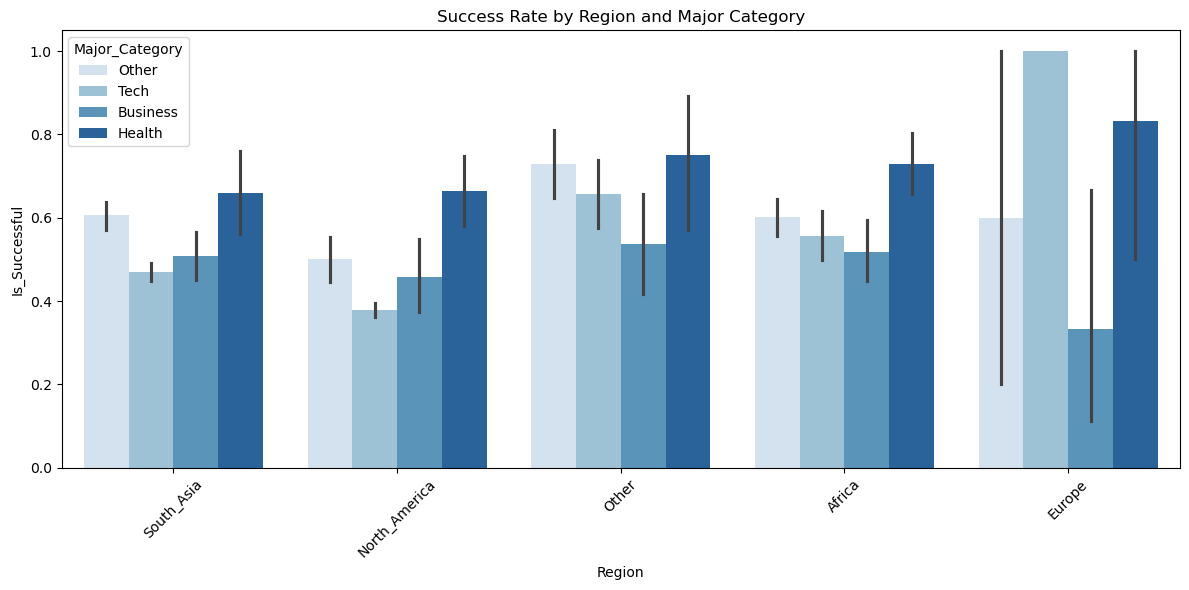

In [63]:
# Region x Major Category vs Success
plt.figure(figsize=(12,6))
sns.barplot(
    x="Region", 
    y="Is_Successful", 
    hue="Major_Category", 
    data=df, 
    estimator=lambda x: sum(x)/len(x),
    palette=sns.color_palette("Blues", n_colors=df["Major_Category"].nunique()) 
)
plt.title("Success Rate by Region and Major Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

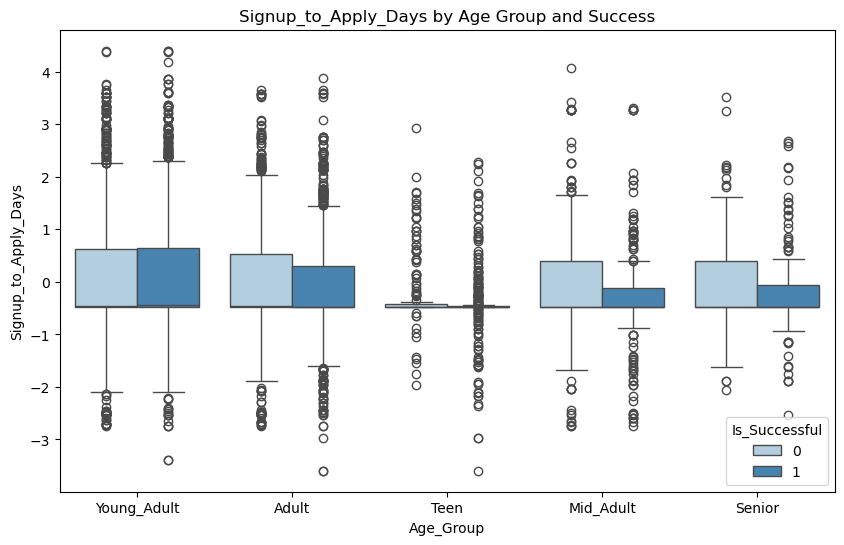

In [65]:
# Signup_to_Apply_Days grouped by Age_Group and colored by success
plt.figure(figsize=(10,6))
sns.boxplot(
    x="Age_Group", 
    y="Signup_to_Apply_Days", 
    hue="Is_Successful", 
    data=df,
    palette=sns.color_palette("Blues", n_colors=df["Is_Successful"].nunique())  # light blues
)
plt.title("Signup_to_Apply_Days by Age Group and Success")
plt.show()

 Columns 33 to 47

In [39]:
# Select only columns 33 to 47 (Python is 0-indexed, so 32:47+1)
df_selected = df.iloc[:, 32:47]

df_selected.head()

,Late_Applicant,Opportunity_Popularity,Popular_Opportunity,Age_Major_Combo,Country_Gender,Region_Opportunity,Engagement_Score,Engagement_Level,Apply_vs_Start_Gap,Applications_per_User,Unique_Categories_per_User,Region_AgeGroup,Applications_for_Opportunity,Region_Normalized_Applications,User_Success_Rate
0,0,1.775924,1,Young_Adult_Other,Pakistan_Female,South_Asia_Course,1.0,High,-460,1,1,South_Asia_Young_Adult,1423,1.0,1.000000
1,0,1.775924,1,Young_Adult_Tech,India_Female,South_Asia_Course,1.0,High,-300,14,2,South_Asia_Young_Adult,1423,1.0,0.142857
2,1,1.775924,1,Young_Adult_Tech,United States_Male,North_America_Course,0.6,High,-604,17,3,North_America_Young_Adult,1423,1.0,0.470588
3,0,1.775924,1,Adult_Tech,United States_Female,North_America_Course,0.6,High,-549,13,3,North_America_Adult,1423,1.0,0.384615
4,0,1.775924,1,Young_Adult_Tech,United States_Male,North_America_Course,1.0,High,-447,1,1,North_America_Young_Adult,1423,1.0,1.000000


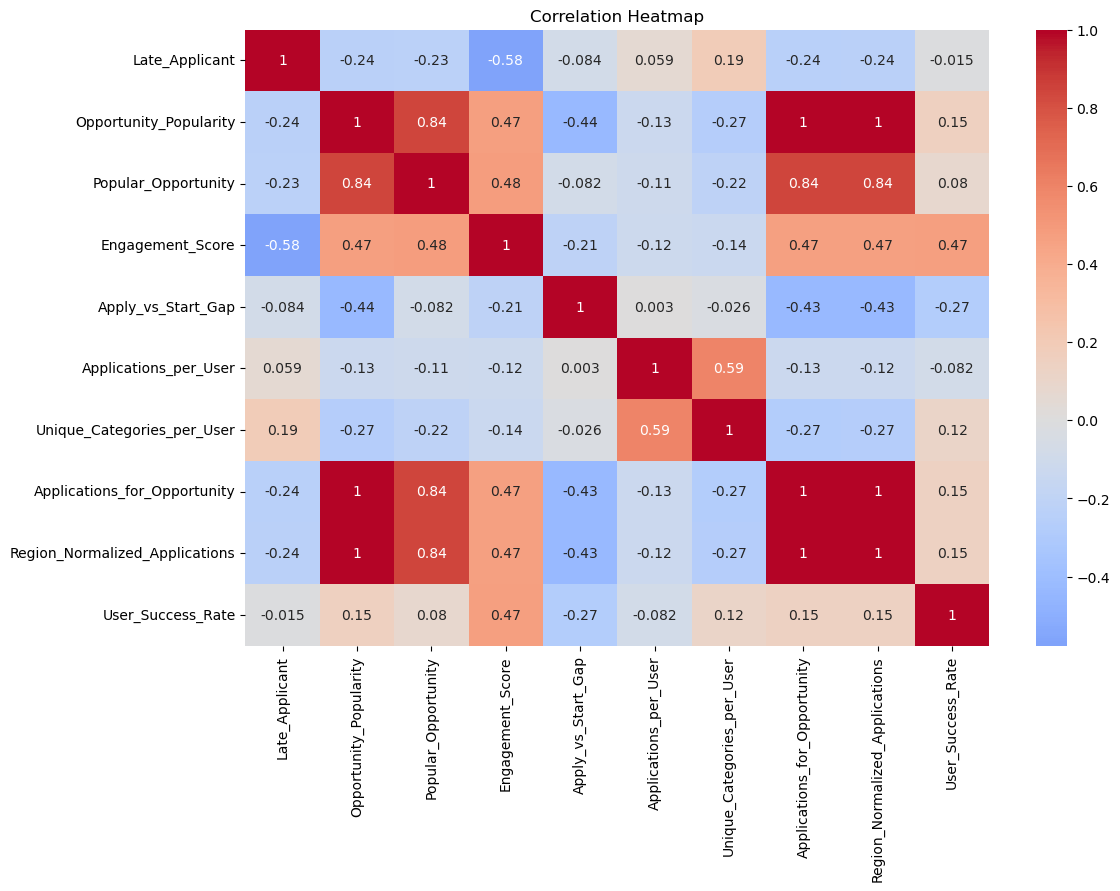

In [51]:
# Correlation heatmap (numeric columns only)
numeric_df = df_selected.select_dtypes(include=['int64', 'float64'])

if not numeric_df.empty:
    plt.figure(figsize=(12,8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

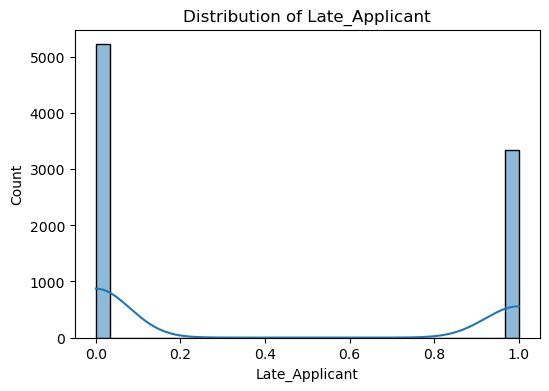

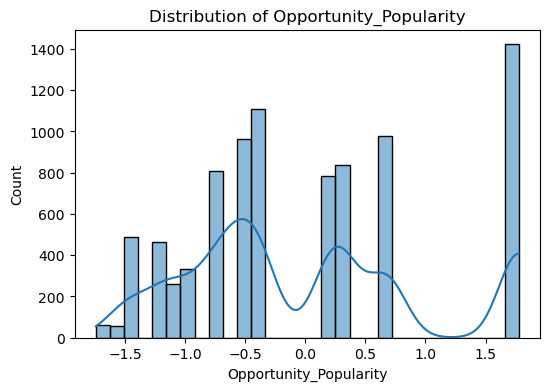

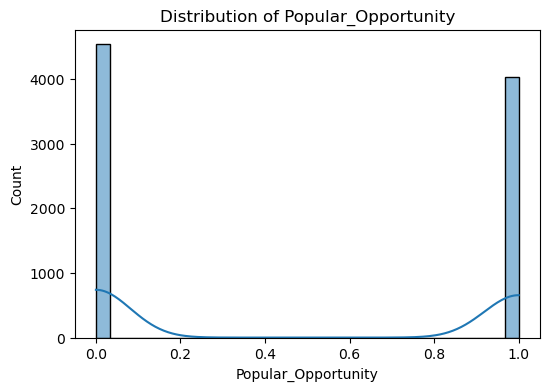

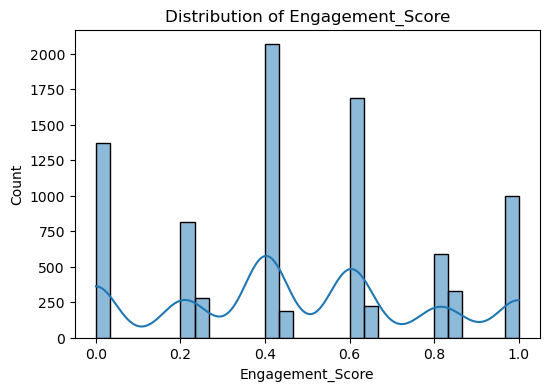

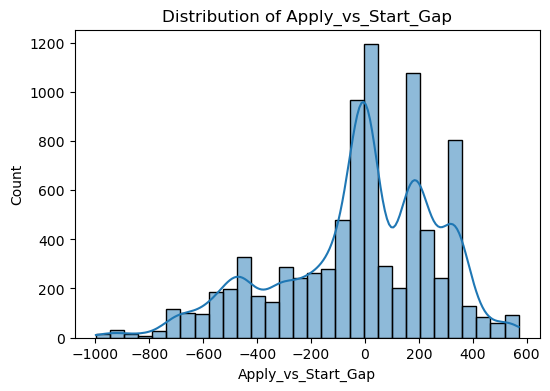

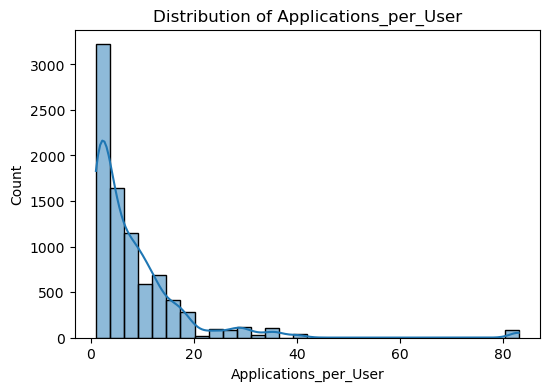

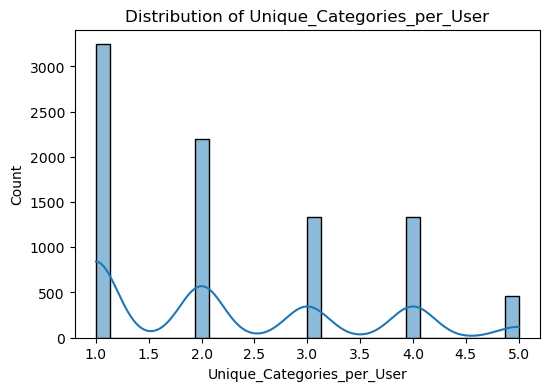

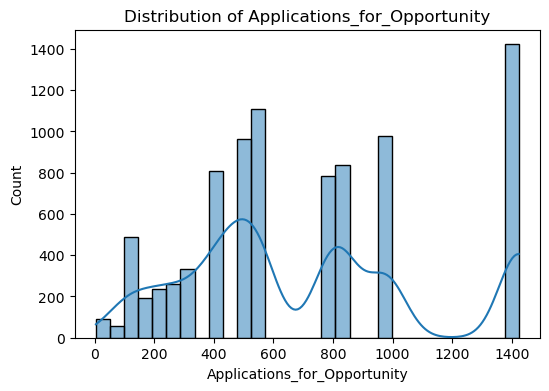

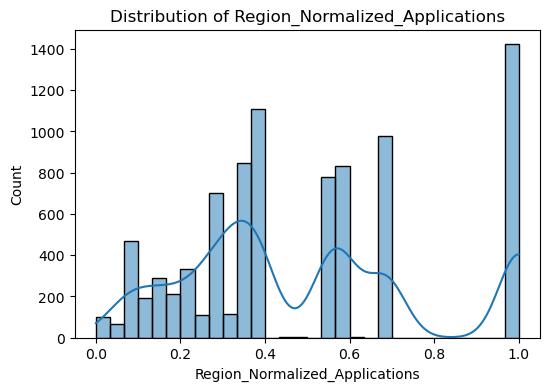

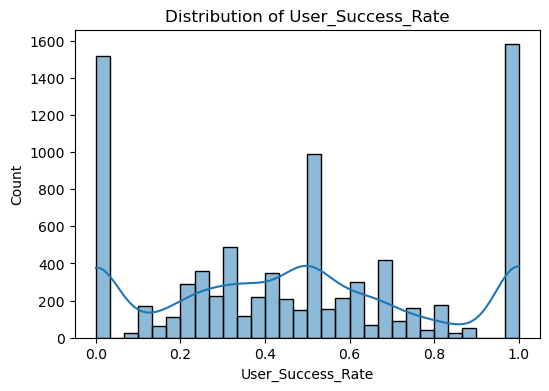

In [43]:
# Distribution plots for numerical columns
num_cols = df_selected.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_selected[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

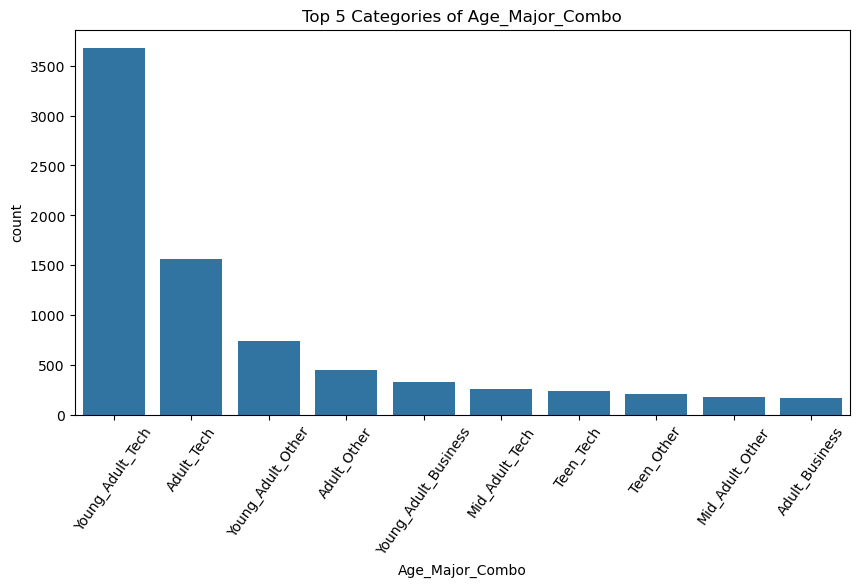

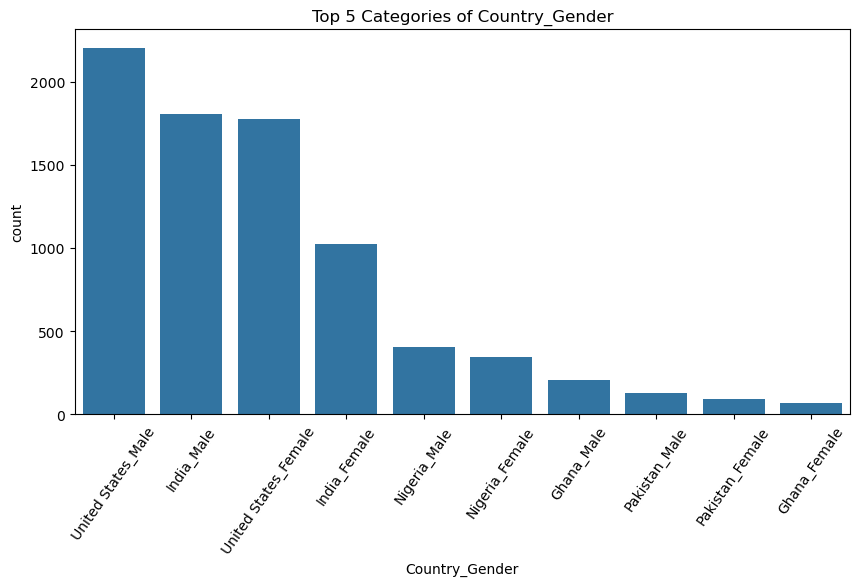

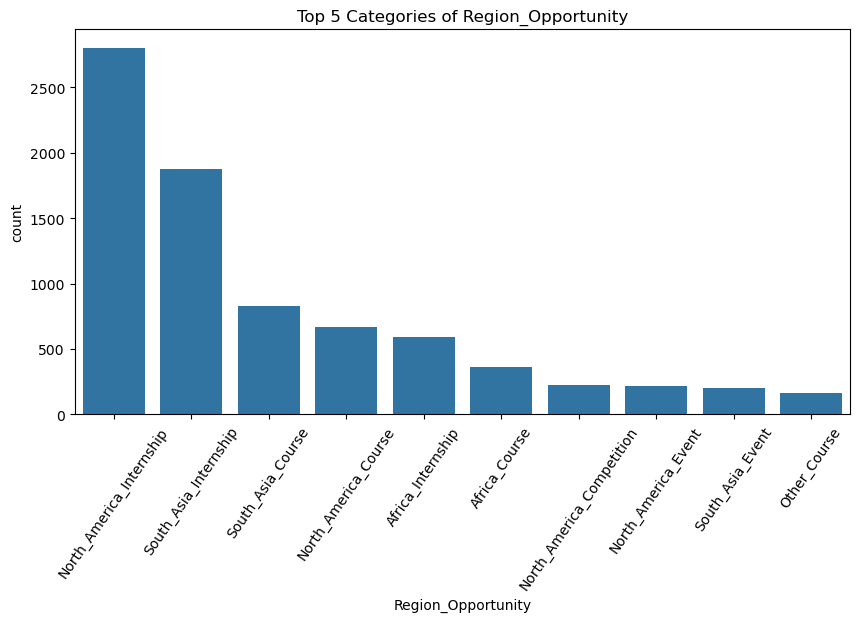

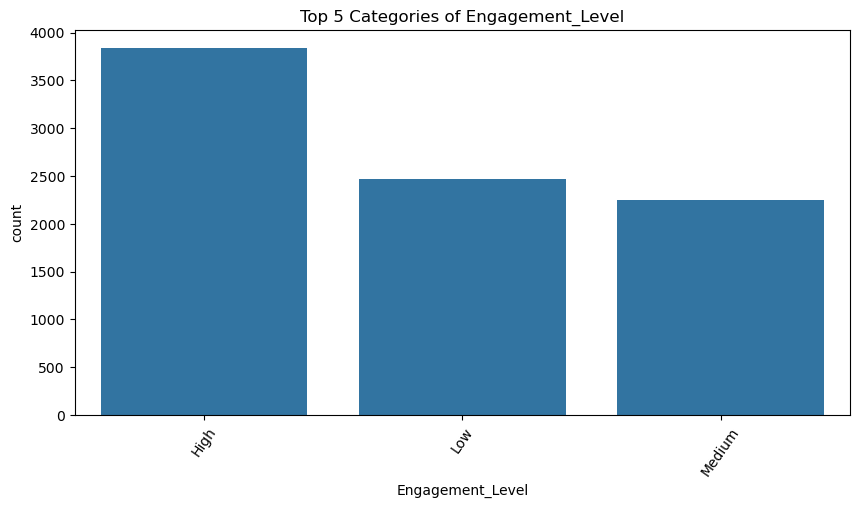

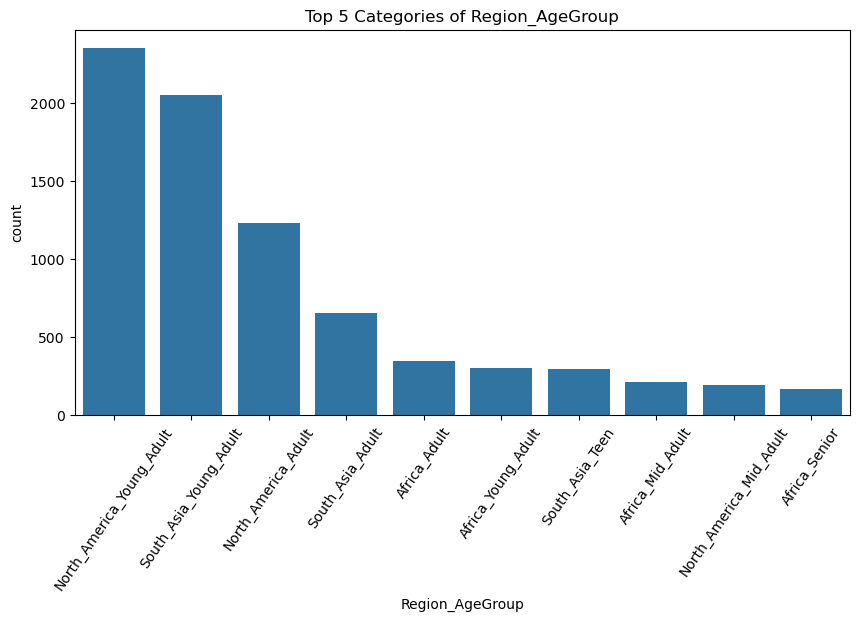

In [45]:
# Countplots for categorical columns (Top 5 categories only)
cat_cols = df_selected.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(10,5))
    
    # Get top 5 categories
    top5 = df_selected[col].value_counts().head(10).index
    sns.countplot(data=df_selected[df_selected[col].isin(top5)], x=col, order=top5)
    
    plt.title(f"Top 10 Categories of {col}")
    plt.xticks(rotation=55)
    plt.show()